# Day 8: Space Image Format
## PART I
The Elves' spirits are lifted when they realize you have an opportunity to reboot one of their Mars rovers, and so they are curious if you would spend a brief sojourn on Mars. You land your ship near the rover.

When you reach the rover, you discover that it's already in the process of rebooting! It's just waiting for someone to enter a BIOS password. The Elf responsible for the rover takes a picture of the password (your puzzle input) and sends it to you via the Digital Sending Network.

Unfortunately, images sent via the Digital Sending Network aren't encoded with any normal encoding; instead, they're encoded in a special Space Image Format. None of the Elves seem to remember why this is the case. They send you the instructions to decode it.

Images are sent as a series of digits that each represent the color of a single pixel. The digits fill each row of the image left-to-right, then move downward to the next row, filling rows top-to-bottom until every pixel of the image is filled.

Each image actually consists of a series of identically-sized layers that are filled in this way. So, the first digit corresponds to the top-left pixel of the first layer, the second digit corresponds to the pixel to the right of that on the same layer, and so on until the last digit, which corresponds to the bottom-right pixel of the last layer.

For example, given an image 3 pixels wide and 2 pixels tall, the image data `123456789012` corresponds to the following image layers:

````
Layer 1: 123
         456

Layer 2: 789
         012
````

The image you received is 25 pixels wide and 6 pixels tall.

To make sure the image wasn't corrupted during transmission, the Elves would like you to find the layer that contains the fewest 0 digits. On that layer, what is the number of 1 digits multiplied by the number of 2 digits?

In [1]:
# Libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read and clean data
images = open("./data/pixels.txt").read()

# Variables
width = 25
length = 6
layer_size = width * length
min_layer = '0'* layer_size
idx = 0

# Find layer with lowest number of 0s
while idx < len(images):
    # Find layer
    layer = images[idx:idx+layer_size]
    # Compare current layer vs current mininum #0s layer
    if layer.count('0') < min_layer.count('0'):
        min_layer = layer
    # Update index
    idx += layer_size
    
# Result
print(f"The result is {int(min_layer.count('1')) * int(min_layer.count('2'))}.")

The result is 2176.


## PART II
Now you're ready to decode the image. The image is rendered by stacking the layers and aligning the pixels with the same positions in each layer. The digits indicate the color of the corresponding pixel: 0 is black, 1 is white, and 2 is transparent.

The layers are rendered with the first layer in front and the last layer in back. So, if a given position has a transparent pixel in the first and second layers, a black pixel in the third layer, and a white pixel in the fourth layer, the final image would have a black pixel at that position.

For example, given an image 2 pixels wide and 2 pixels tall, the image data `0222112222120000` corresponds to the following image layers:
````
Layer 1: 02
         22

Layer 2: 11
         22

Layer 3: 22
         12

Layer 4: 00
         00
````
Then, the full image can be found by determining the top visible pixel in each position:

The top-left pixel is black because the top layer is 0.
The top-right pixel is white because the top layer is 2 (transparent), but the second layer is 1.
The bottom-left pixel is white because the top two layers are 2, but the third layer is 1.
The bottom-right pixel is black because the only visible pixel in that position is 0 (from layer 4).
So, the final image looks like this:
````
01
10
````
What message is produced after decoding your image?

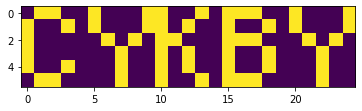

In [3]:
# Find visible values in each pixel position
pixels = [int(images[idx:len(images):layer_size].lstrip('2')[0]) for idx in range(layer_size)]

# Reshape image
message = np.array(pixels).reshape((length, width))

# Print message
plt.imshow(message)
plt.show()